In [29]:
import math
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import scipy.stats as stats



In [30]:
# get normalized predicted posterior

def process_data(data):
    c1 = ['coargument','possessor'] #one for each condition
    c2 = ['Non-local NP', 'Local NP']
    c3 = ['ta', 'taziji', 'ziji']
    
    others = {'senID':[i for i in range(1,31)],
        'experiment':['likelihood' for x in range(1,31)],
        'condition': ['Others' for x in range(1,31)],
        'selection':['ta' for x in range(1,31)],
        'Prob':[1 for x in range(1,31)]
       }
    others = pd.DataFrame(others)
    others['type'] = np.where(others['senID'] < 15, 'co-argument', 'possessor')
    data = data.append(others, ignore_index = True) 

    df1 = data[(data.experiment == 'posterior')][['senID','type','selection','condition','Prob']].rename(columns={"Prob": "posterior",'selection':'c2','condition':"c3",'type':'c1'})
    df2 = data[(data.experiment == 'prior')][['senID','type','selection','Prob']].rename(columns={"Prob": "prior",'selection':'c2','type':'c1'})
    df3 = data[(data.experiment == 'likelihood')][['senID','type','selection','condition','Prob']].rename(columns={"Prob": "likelihood",'selection':'c3','condition':"c2",'type':'c1'})
    result = pd.merge(df1,df2)
    df = pd.merge(result,df3)

    df['estimate_posterior'] = df.apply(lambda row: row.prior * row.likelihood, axis=1)
    #df['estimate_posterior_log'] = df.apply(lambda row: np.log(row.prior) + np.log(row.likelihood), axis=1)
    df[["senID",'c1',"c2",'c3','posterior','estimate_posterior']]

    df = df.sort_values(by=['senID', 'c3'])
    
    for i in range(1,31):
        for c in c3:
            ddf = df[(df.senID == i)&(df.c3 == c)]
            val = ddf["estimate_posterior"].tolist()
            #print(ddf)
            norm = [float(i)/sum(val) if sum(val)!=0 else 0 for i in val]
            #print(norm)
            df.loc[(df.senID == i)&(df.c3 == c), "estimate_posterior"] = norm

    return df


In [36]:

def violintPlot(condition, type, order):
    
    #order = ['Non-local NP','Local NP', 'others']
    
    posterior = data[(data.experiment == 'posterior')&(data.type == type)][['senID','type','condition','selection','Prob']]
    sns.set_style('whitegrid')

    x = "selection"
    y = "Prob"
    order = order
    ax = sns.boxplot(data=posterior[(posterior.condition == condition)], x=x, y=y, order=order).set(title='{} Interpretation Distribution in {} condition'.format(condition, type))
    ax = sns.stripplot(data=posterior[(posterior.condition == condition)], x=x, y=y, order=order,palette = "pastel")
    ax = sns.violinplot(data=posterior[(posterior.condition == condition)], x=x, y=y, order=order)
    plt.show()

    if len(order) == 3:
        fvalue, pvalue = stats.f_oneway(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[2])].Prob)
        print(fvalue, pvalue)
        
        pval_1 = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob)[1]
        pval_1_t = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob)[0]
        print("The differences between P(Non-local NP | {}) and P(Local NP | {}) is significant with p-value: {} and t-stats: {}".format(condition, condition, pval_1, pval_1_t))


        pval_2 = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[2])].Prob)[1]
        pval_2_t = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[2])].Prob)[0]
        
        print("The differences between P(Non-local NP | {}) and P(Others | {}) is significant with p-value: {} and t-stats: {}".format(condition, condition, pval_2,pval_2_t))

        pval_3 = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[2])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob)[1]
        pval_3_t = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[2])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob)[0]
        
        print("The differences between P(Local NP | {}) and P(Others | {}) is significant with p-value: {} and t-stats: {}".format(condition, condition, pval_3,pval_3_t ))
    
    else:
        pval = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob)[1]
        pval_t = stats.ttest_ind(posterior[(posterior.condition == condition)&(posterior.selection == order[0])].Prob, posterior[(posterior.condition == condition)&(posterior.selection == order[1])].Prob)[0]
        print("The differences between P(Non-local NP | {}) and P(Local NP | {}) is significant with p-value: {} and t-test: {}".format(condition, condition, pval, pval_t))


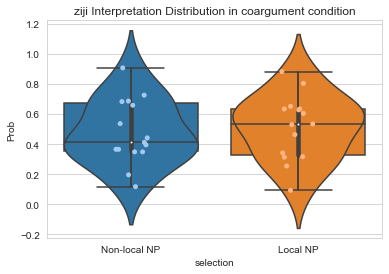

The differences between P(Non-local NP | ziji) and P(Local NP | ziji) is significant with p-value: 0.6757348888231118 and t-test: -0.42271098528951073


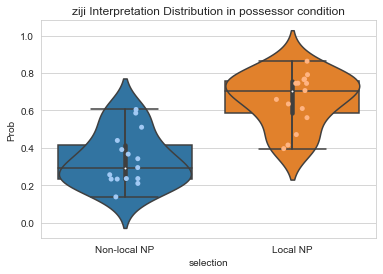

The differences between P(Non-local NP | ziji) and P(Local NP | ziji) is significant with p-value: 1.206813028640894e-06 and t-test: -6.155129424411899


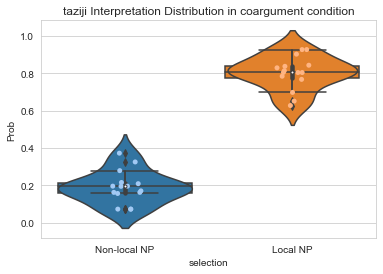

The differences between P(Non-local NP | taziji) and P(Local NP | taziji) is significant with p-value: 1.4167025610704543e-17 and t-test: -19.065976431100907


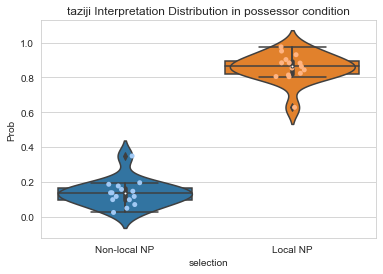

The differences between P(Non-local NP | taziji) and P(Local NP | taziji) is significant with p-value: 1.2147899995249954e-20 and t-test: -24.89357196523247


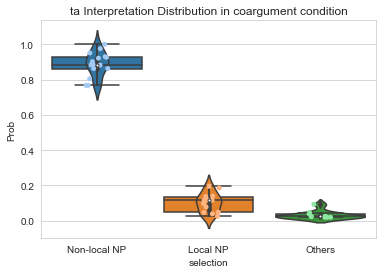

997.9663581968776 1.3693639833655253e-31
The differences between P(Non-local NP | ta) and P(Local NP | ta) is significant with p-value: 8.54837675802721e-23 and t-stats: 33.129485583465346
The differences between P(Non-local NP | ta) and P(Others | ta) is significant with p-value: 3.433157010434176e-22 and t-stats: 37.72957382928693
The differences between P(Local NP | ta) and P(Others | ta) is significant with p-value: 0.0010379632207879737 and t-stats: -3.8036339952867673


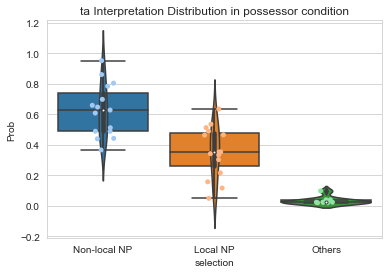

44.28054079168819 1.9795311607935747e-10
The differences between P(Non-local NP | ta) and P(Local NP | ta) is significant with p-value: 0.00015274413048322344 and t-stats: 4.374775711409937
The differences between P(Non-local NP | ta) and P(Others | ta) is significant with p-value: 8.812504053366082e-10 and t-stats: 10.173935669081546
The differences between P(Local NP | ta) and P(Others | ta) is significant with p-value: 1.0490089152215932e-05 and t-stats: -5.673627122597786


In [37]:
pairs = [('ziji', 'coargument', ['Non-local NP','Local NP']), ('ziji', 'possessor', ['Non-local NP','Local NP']),
        ('taziji', 'coargument', ['Non-local NP','Local NP']),('taziji', 'possessor', ['Non-local NP','Local NP']),
        ('ta', 'coargument', ['Non-local NP','Local NP','Others']),('ta', 'possessor', ['Non-local NP','Local NP','Others'])]

for pair in pairs:
    condition = pair[0]
    
    type = pair[1]
    order = pair[2]
    violintPlot(condition, type, order)
    

In [4]:
data = pd.read_csv("final_data_bySenID.csv", index_col=[0])

others = {'senID':[i for i in range(1,31)],
        'experiment':['likelihood' for x in range(1,31)],
        'condition': ['Others' for x in range(1,31)],
        'selection':['ta' for x in range(1,31)],
        'Prob':[1 for x in range(1,31)]
       }
others = pd.DataFrame(others)
others['type'] = np.where(others['senID'] < 15, 'co-argument', 'possessor')
data = data.append(others, ignore_index = True) 
mapping = [ ('Speaker', 'Non-local NP'), ('Clause Subject', 'Local NP'), ('co-argument', 'coargument')]
for k, v in mapping:
    data = data.replace(k, v)
data

df = process_data(data)
df

/var/folders/gd/crxq4l256sx5f_sx6kdf41tr0000gn/T/ipykernel_48718/3289966117.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(others, ignore_index = True)
/var/folders/gd/crxq4l256sx5f_sx6kdf41tr0000gn/T/ipykernel_48718/939236812.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(others, ignore_index = True)


,senID,c1,c2,c3,posterior,prior,likelihood,estimate_posterior
0,1,coargument,Non-local NP,ta,0.882353,0.750000,0.500000,0.696133
3,1,coargument,Local NP,ta,0.098039,0.107143,0.194444,0.038674
6,1,coargument,Others,ta,0.019608,0.142857,1.000000,0.265193
1,1,coargument,Non-local NP,taziji,0.279070,0.750000,0.107143,0.574468
4,1,coargument,Local NP,taziji,0.697674,0.107143,0.555556,0.425532
...,...,...,...,...,...,...,...,...
164,30,possessor,Others,ta,0.023256,0.250000,1.000000,0.270227
158,30,possessor,Non-local NP,taziji,0.195122,0.571429,0.105263,0.309927
161,30,possessor,Local NP,taziji,0.804878,0.178571,0.750000,0.690073
159,30,possessor,Non-local NP,ziji,0.509804,0.571429,0.131579,0.746667


/Users/lisazhao/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


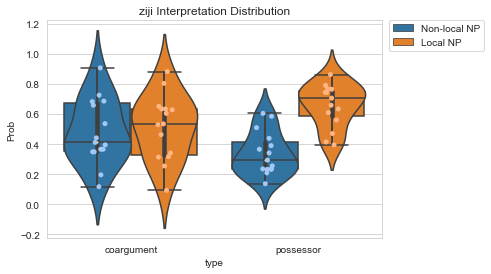

In [16]:
condition = 'ziji'
#order = ['Non-local NP','Local NP', 'others']

posterior = data[(data.experiment == 'posterior')][['senID','type','condition','selection','Prob']]
sns.set_style('whitegrid')

x = "type"
y = "Prob"
hue = 'selection'

order = ['Non-local NP','Local NP']
order = ['coargument', 'possessor']

dd = posterior[(posterior.condition == condition)&((posterior.selection == 'Non-local NP')|(posterior.selection == 'Local NP'))]

sns.boxplot(data=dd, x=x, y=y, hue=hue,order=order)
g = sns.violinplot(data=dd, x=x, y=y, hue=hue)
ax = sns.stripplot(data=dd, x=x, y=y, hue=hue,split=True,palette = "pastel")
handles, labels = ax.get_legend_handles_labels()
ax.set(title="ziji Interpretation Distribution")
lgd = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.savefig('ziji_Interpretation.png', bbox_extra_artists=(lgd,), bbox_inches='tight')


/Users/lisazhao/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


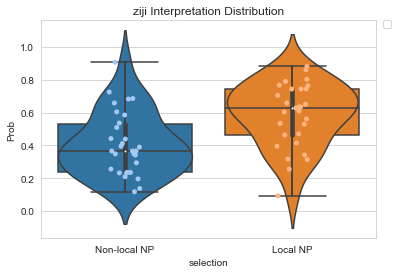

In [6]:
condition = 'ziji'
#order = ['Non-local NP','Local NP', 'others']

posterior = data[(data.experiment == 'posterior')][['senID','type','condition','selection','Prob']]
sns.set_style('whitegrid')

x = "selection"
y = "Prob"

order = ['Non-local NP','Local NP']
#order = ['coargument', 'possessor']

dd = posterior[(posterior.condition == condition)&((posterior.selection == 'Non-local NP')|(posterior.selection == 'Local NP'))]

sns.boxplot(data=dd, x=x, y=y,order=order)
g = sns.violinplot(data=dd, x=x, y=y)
ax = sns.stripplot(data=dd, x=x, y=y,split=True,palette = "pastel")
handles, labels = ax.get_legend_handles_labels()
ax.set(title="ziji Interpretation Distribution")
plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('ziji_Interpretation.png')



/Users/lisazhao/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


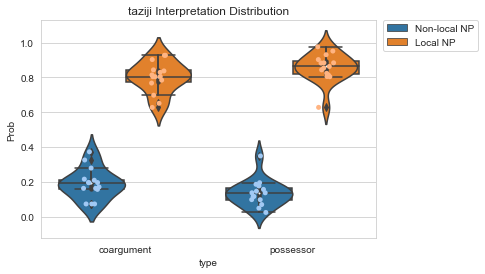

In [17]:
condition = 'taziji'
#order = ['Non-local NP','Local NP', 'others']

posterior = data[(data.experiment == 'posterior')][['senID','type','condition','selection','Prob']]
sns.set_style('whitegrid')

x = "type"
y = "Prob"
hue = 'selection'

order = ['Non-local NP','Local NP']
order = ['coargument', 'possessor']

dd = posterior[(posterior.condition == condition)&((posterior.selection == 'Non-local NP')|(posterior.selection == 'Local NP'))]

sns.boxplot(data=dd, x=x, y=y, hue=hue,order=order)
g = sns.violinplot(data=dd, x=x, y=y, hue=hue)
ax = sns.stripplot(data=dd, x=x, y=y, hue=hue,split=True,palette = "pastel")
handles, labels = ax.get_legend_handles_labels()
ax.set(title="taziji Interpretation Distribution")
lgd = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



plt.savefig('taziji_Interpretation.png', bbox_extra_artists=(lgd,), bbox_inches='tight')


/Users/lisazhao/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


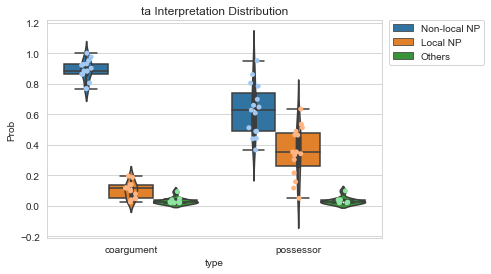

In [18]:
condition = 'ta'
#order = ['Non-local NP','Local NP', 'others']

posterior = data[(data.experiment == 'posterior')][['senID','type','condition','selection','Prob']]
sns.set_style('whitegrid')

x = "type"
y = "Prob"
hue = 'selection'

order = ['coargument', 'possessor']

dd = posterior[(posterior.condition == condition)&((posterior.selection == 'Non-local NP')|(posterior.selection == 'Others')|(posterior.selection == 'Local NP'))]

sns.boxplot(data=dd, x=x, y=y, hue=hue,order=order)
g = sns.violinplot(data=dd, x=x, y=y, hue=hue)
ax = sns.stripplot(data=dd, x=x, y=y, hue=hue,split=True,palette = "pastel")
handles, labels = ax.get_legend_handles_labels()
ax.set(title="ta Interpretation Distribution")
lgd = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



plt.savefig('ta_Interpretation.png', bbox_extra_artists=(lgd,), bbox_inches='tight')


/Users/lisazhao/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


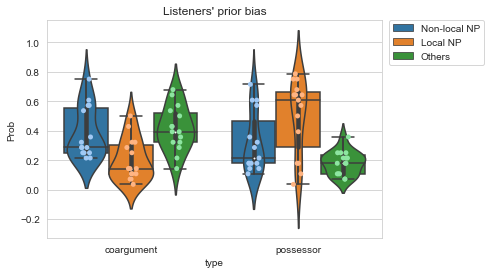

In [15]:
prior = data[(data.experiment == 'prior')][['senID','type','condition','selection','Prob']]
sns.set_style('whitegrid')

x = "selection"
y = "Prob"
hue = 'type'


order = ['Non-local NP', 'Local NP', 'Others']
order = ['coargument', 'possessor']



ax = sns.boxplot(data=prior, x=hue, y=y, hue=x,order=order)
ax.set(title="Listeners' prior bias")
handles, labels = ax.get_legend_handles_labels()
g = sns.violinplot(data=prior, x=hue, y=y, hue=x)
ax = sns.stripplot(data=prior, x=hue, y=y,hue=x,split=True,palette = "pastel")
lgd = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Listeners_prior_bias.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()




In [11]:
order = ['Non-local NP', 'Local NP', 'Others']

prior_po = prior[prior.type == 'possessor']

print ('The sentence type is possessor')
order = ['Non-local NP', 'Local NP', 'Others']
pval_1 = stats.ttest_ind(prior_po[(prior_po.selection == order[0])].Prob, prior_po[(prior_po.selection == order[1])].Prob)[1]
print("The differences between P(Non-local NP) and P(Local NP) is significant with p-value: {}".format(pval_1))

pval_2 = stats.ttest_ind(prior_po[(prior_po.selection == order[0])].Prob, prior_po[(prior_po.selection == order[2])].Prob)[1]
print("The differences between P(Non-local NP) and P(Others) is significant with p-value: {}".format(pval_2))

pval_3 = stats.ttest_ind(prior_po[(prior_po.selection == order[2])].Prob, prior_po[(prior_po.selection == order[1])].Prob)[1]
print("The differences between P(Others) and P(Local NP) is significant with p-value: {}".format(pval_3))


The sentence type is possessor
The differences between P(Non-local NP) and P(Local NP) is significant with p-value: 0.04298060728486839
The differences between P(Non-local NP) and P(Others) is significant with p-value: 0.023554101172588087
The differences between P(Others) and P(Local NP) is significant with p-value: 8.978575108520814e-05


In [12]:
order = ['Non-local NP', 'Local NP', 'Others']

prior_co = prior[prior.type == 'coargument']
print ('The sentence type is coargument')

order = ['Non-local NP', 'Local NP', 'Others']
pval_1 = stats.ttest_ind(prior_co[(prior_co.selection == order[0])].Prob, prior_co[(prior_co.selection == order[1])].Prob)[1]
print("The differences between P(Non-local NP) and P(Local NP) is significant with p-value: {}".format(pval_1))

pval_2 = stats.ttest_ind(prior_co[(prior_co.selection == order[0])].Prob, prior_co[(prior_co.selection == order[2])].Prob)[1]
print("The differences between P(Non-local NP) and P(Others) is not significant with p-value: {}".format(pval_2))

pval_3 = stats.ttest_ind(prior_co[(prior_co.selection == order[2])].Prob, prior_co[(prior_co.selection == order[1])].Prob)[1]
print("The differences between P(Others) and P(Local NP) is significant with p-value: {}".format(pval_3))


The sentence type is coargument
The differences between P(Non-local NP) and P(Local NP) is significant with p-value: 0.004004488597350588
The differences between P(Non-local NP) and P(Others) is not significant with p-value: 0.6069052878187668
The differences between P(Others) and P(Local NP) is significant with p-value: 0.0004546837880274298
